In [8]:
import numpy as np
from numpy import array, nan
import matplotlib.pyplot as plt
import pandas as pd

dataset = "digg"

# points = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000, 40000, 60000, 80000, 100000]

In [9]:
with open(dataset + '_modified1.txt', 'r') as content_file:
    content = content_file.read()
exec(content)
# content
# sample_ns = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000, 40000, 60000, 80000, 100000]
#s_mapk[1] = s_mapk[1][::2]

# Графики метрик в зависимости от количества сэмплирований

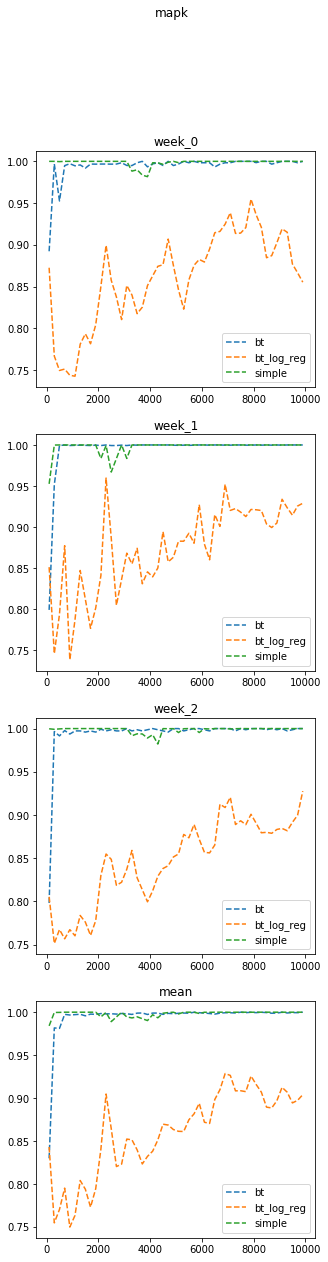

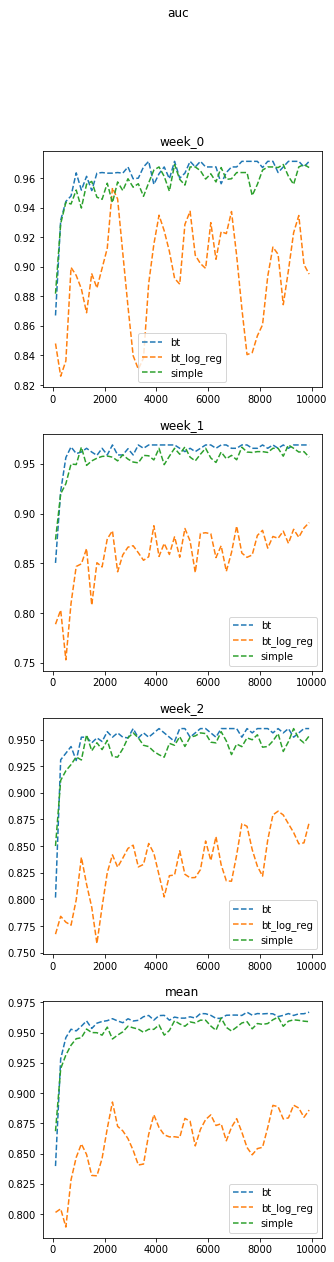

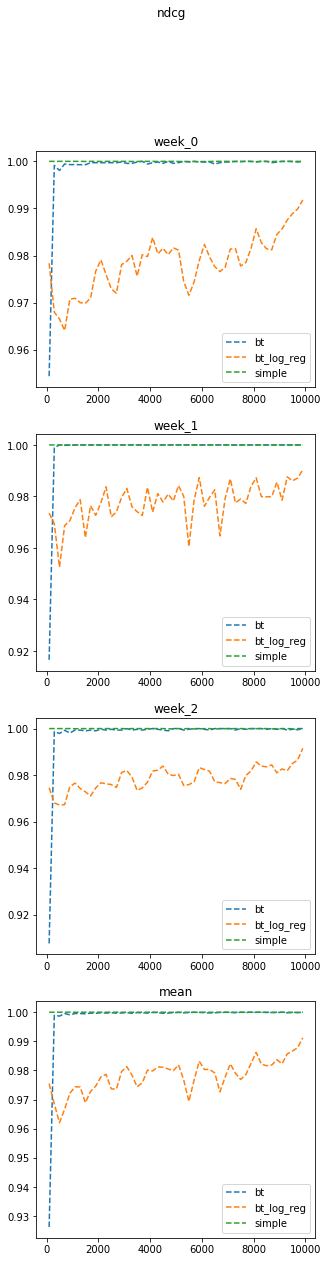

In [38]:

#print(eval("s_auc"))
np.random.seed(1)

for m_idx, metric in enumerate(["mapk", "auc", "ndcg"]):
    fig, ax = plt.subplots(ncols=1, nrows = len(bt) +1, figsize=(5,20)) 
    mean_s = np.zeros(len(sample_ns))
    mean_bt = np.zeros(len(sample_ns))
    mean_bt_round = np.zeros(len(sample_ns))
    mean_bt_grad = np.zeros(len(sample_ns))
    mean_bt_log_reg = np.zeros(len(sample_ns))
    for idx, (b, s, lg) in enumerate(zip(bt, eval("s_" + metric), bt_log_reg)):
        bt_aucs = [b[k][m_idx] for k in b]
        mean_bt += np.array(bt_aucs)
        ax[idx].plot(sample_ns, bt_aucs, label = 'bt', linestyle = '--')
  
        bt_aucs = [lg[k][m_idx] for k in lg]
        bt_aucs = np.array(bt_aucs)
        
        mean_bt_log_reg += bt_aucs 
        ax[idx].plot(sample_ns, bt_aucs, label = 'bt_log_reg', linestyle = '--')
        
        mean_s += np.array(s)
        ax[idx].plot(sample_ns, s, label = 'simple', linestyle = '--')
        ax[idx].legend()

        ax[idx].set_title("week_"+str(idx))

    mean_bt /= len(bt)
    # mean_bt_round /= len(bt_round)
    mean_s /= len(bt_round)
    mean_bt_log_reg /= len(bt_log_reg)
    # mean_bt_grad /= len(bt_grad)
    #print(mean_bt_grad)
    ax[len(bt)].set_title("mean")
    # ax[len(bt)].plot(sample_ns, mean_bt_round, label = 'round_bt', linestyle = '--')
    ax[len(bt)].plot(sample_ns, mean_bt, label = 'bt', linestyle = '--')
    ax[len(bt)].plot(sample_ns, mean_bt_log_reg, label = 'bt_log_reg', linestyle = '--')
    ax[len(bt)].plot(sample_ns, mean_s, label = 'simple', linestyle = '--')
    ax[len(bt)].legend()
    fig.suptitle(metric)
    plt.savefig(dataset +"_all_" + metric + ".png", dpi=500)
    plt.show()

# График NDCG в зависимости от параметра K

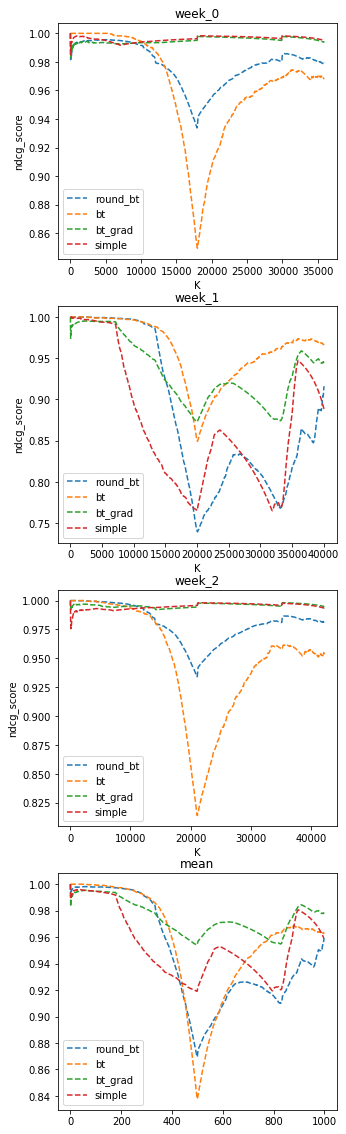

In [22]:
fig, ax = plt.subplots(ncols=1, nrows = len(bt) +1, figsize=(5,20)) 

mean_s = None#np.zeros(len(k_points[0]))
mean_bt = np.zeros(len(k_points[0]))
mean_bt_round = np.zeros(len(k_points[0]))
mean_bt_grad = np.zeros(len(k_points[0]))


for idx, (r, b, g, s) in enumerate(zip(bt_round_ndcg_K, bt_ndcg_K, bt_grad_ndcg_K, s_ndcg_K)):#[(a0, b0, c0, s0), (a1, b1, c1, s1), (a2, b2,c2, s2)]):
#     bt_aucs = [a[k][1] for k in a]
#     ax[idx].plot(sample_ns, bt_aucs, label = 'old_bt', linestyle = '--')
    bt_aucs = [r[k][2] for k in r][0]
    mean_bt_round += np.array(bt_aucs)
    ax[idx].plot(k_points[idx], bt_aucs, label = 'round_bt', linestyle = '--')
    bt_aucs = [b[k][2] for k in b][0]
    mean_bt += np.array(bt_aucs)
    ax[idx].plot(k_points[idx], bt_aucs, label = 'bt', linestyle = '--')
    bt_aucs = [g[k][2] for k in g][0]
    mean_bt_grad += np.array(bt_aucs)
    ax[idx].plot(k_points[idx], bt_aucs, label = 'bt_grad', linestyle = '--')
    s = np.squeeze(np.array(s))
#     print( np.array(s).shape, mean_s.shape)
    if mean_s is None:
        mean_s = s
    else:
        mean_s += s
    #print(s.shape)
    ax[idx].plot(k_points[idx], s, label = 'simple', linestyle = '--')
    ax[idx].legend()
    ax[idx].set_xlabel("K")
    ax[idx].set_ylabel("ndcg_score")
    ax[idx].set_title("week_"+str(idx))
    
mean_bt /= len(bt)
mean_bt_round /= len(bt_round)
mean_s /= len(bt_round)
mean_bt_grad /= len(bt_round)
#print(mean_bt_grad)
ax[len(bt)].set_title("mean")
ax[len(bt)].plot(np.arange(len(k_points[0])), mean_bt_round, label = 'round_bt', linestyle = '--')
ax[len(bt)].plot(np.arange(len(k_points[0])), mean_bt, label = 'bt', linestyle = '--')
ax[len(bt)].plot(np.arange(len(k_points[0])), mean_bt_grad, label = 'bt_grad', linestyle = '--')
ax[len(bt)].plot(np.arange(len(k_points[0])), mean_s, label = 'simple', linestyle = '--')
ax[len(bt)].legend()

plt.savefig("digg_ndcg_k=5000.png", dpi=300)
plt.show()

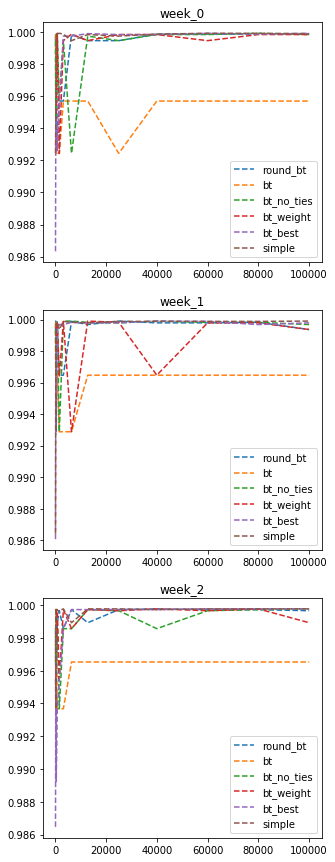

In [21]:
fig, ax = plt.subplots(ncols=1, nrows = 3, figsize=(5,15)) 
for idx, (a, b, c, d, best, w, s) in enumerate(zip(a, b, c, k, d,w, s_ndcg)):#[(a0, b0, c0, s0), (a1, b1, c1, s1), (a2, b2,c2, s2)]):
#     bt_aucs = [a[k][0] for k in a]
#     ax[idx].plot(sample_ns, bt_aucs, label = 'old_bt', linestyle = '--')
    bt_aucs = [b[k][2] for k in b]
    ax[idx].plot(sample_ns, bt_aucs, label = 'round_bt', linestyle = '--')
    bt_aucs = [c[k][2] for k in c]
    ax[idx].plot(sample_ns, bt_aucs, label = 'bt', linestyle = '--')
    bt_aucs = [d[k][2] for k in d]
    ax[idx].plot(sample_ns, bt_aucs, label = 'bt_no_ties', linestyle = '--')
    bt_aucs = [w[k][2] for k in w]
    ax[idx].plot(sample_ns, bt_aucs, label = 'bt_weight', linestyle = '--')
    bt_aucs = [best[k][2] for k in best]
    ax[idx].plot(sample_ns, bt_aucs, label = 'bt_best', linestyle = '--')
    
    ax[idx].plot(sample_ns, s, label = 'simple', linestyle = '--')
    ax[idx].legend()
    
    ax[idx].set_title("week_"+str(idx))
plt.savefig("youtube_ndcg.png", dpi=300)
plt.show()

# Графики для попыток аппроксимировать значения индекса svd разложением sparse матрицы

In [2]:
dens_val = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 0.9, 1.0]
feature_auc = 0.966627
values200 = [0.505380196980781, 0.6531648076603104, 0.6498757264286332, 0.5312261438760753, 0.5595142607923679, 0.6361202218052421, 0.7458646506159385, 0.5252798773265971, 0.8393899642077906, 0.7171005634567559, 0.8084995594780054, 0.9509989201397409, 0.9504990466282048, 0.9695686143189024, 0.9667627276053644]

values100 = [0.49403661486929046, 0.4944660906085455, 0.7950795543038246, 0.4945110336678198, 0.2867229824101989, 0.6444003154388369, 0.7293260194760974, 0.6508523582910206, 0.9597163357974663, 0.8647981055323365, 0.7614328722806685, 0.8605027980106454, 0.9560506348963944, 0.9677113485586467, 0.9667627273189879]

values50 = [0.6406960997704266, 0.7266850321824632, 0.7094471949240467, 0.5167454229939981, 0.41113673160743847, 0.45125794018341425, 0.6640946969540634, 0.7545577849881179, 0.9620618092386215, 0.9705190622106801, 0.9556596187970132, 0.9696162215381927, 0.9709780652222868, 0.9691926524561889, 0.9667505772257924]
values10 = [0.49043446533896196, 0.7203001809751326, 0.8394096173636991, 0.7334084588083398, 0.8751929769115306, 0.6516198334026139, 0.7484344999973842, 0.8371940560169018, 0.863554083988457, 0.9357083518880924, 0.9690565491895872, 0.9630902397258664, 0.9678444700737612, 0.9688940339967299, 0.966748672679282]
name = "preferrential_attachment"

In [8]:
feature_auc =  0.830499
values200 = [0.4999966190397558, 0.6347948727890828, 0.6084191735828213, 0.5284370545725923, 0.6660784895527861, 0.7014678354990466, 0.6948299483701199, 0.6670279832382683, 0.6823848745550285, 0.8908192077037715, 0.8845514478039821, 0.7456735589205084, 0.8369066113933562, 0.7518030758921287, 0.7353935986650206]

values100 = [0.44461086924845267, 0.5830579752274141, 0.4203587057520607, 0.49571109055753054, 0.5185377949939507, 0.5003493928589811, 0.6185588353000566, 0.4949847455461086, 0.6285897386913848, 0.8354110009880301, 0.5596884425318026, 0.7999838239981801, 0.9091479560586693, 0.8223663137591376, 0.7355307628131436]

values50 =  [0.5275799583838446, 0.5541516085209607, 0.5568630421276828, 0.6583677674082355, 0.46738576546640415, 0.35415777317474634, 0.5779012608356204, 0.49413050553277976, 0.6226242057373796, 0.6765531852143308, 0.778306305256714, 0.7021322690744047, 0.7898109766927696, 0.750707004005833, 0.7251307332215229]

values10 = [0.4724296687329197, 0.44582498936916265, 0.49796847704011776, 0.41046072470103295, 0.5730996148542734, 0.5974041089197593, 0.5872350811601074, 0.7720358101755512, 0.7215971810148009, 0.6914431295802421, 0.7591540705679406, 0.7857016199798541, 0.7873555899695267, 0.6801884783786863, 0.7542010275294335]

name = "common_neigbors_num"

In [6]:
feature_auc =  0.828479
values200 = [0.4722811801148773, 0.4461098419995546, 0.47259906011046404, 0.39755073634868476, 0.5543867588020316, 0.6585474424205316, 0.6807586962532982, 0.7909491283035098, 0.7496090304367901, 0.7546409887988289, 0.7854663468432922, 0.8422246539476652, 0.8707750873868255, 0.8555759725919783, 0.8766261807359307]

values100 = [0.5275253899260648, 0.47353390664338596, 0.5014964996041709, 0.6146049563653775, 0.6965756043542618, 0.5868458414537804, 0.6491447528580082, 0.6290714689667891, 0.7520390432051807, 0.8028664504334394, 0.8227875215242108, 0.8288583392011009, 0.8417034408093691, 0.8617412993622784, 0.8453657129253309]

values50 = [0.5000139963621005, 0.5534087617831576, 0.6325549667243581, 0.6756650445308549, 0.4779494162366917, 0.7057103343461767, 0.689983289167271, 0.7064173533867725, 0.6684073193680348, 0.7614558296479353, 0.7101602006641088, 0.6860617780728466, 0.8107789495511281, 0.7885518522282269, 0.8223713249172635]
values10 = [0.500006505327198, 0.5547307054970758, 0.4988968587681081, 0.5664281525220255, 0.6801600099832202, 0.6710230412434892, 0.7083236699899493, 0.703714856872784, 0.681660040036136, 0.570233997461259, 0.6858353986429861, 0.6563175851618783, 0.7533459956852487, 0.600522643531336, 0.6950962163150979]

name = "jaccard_coefficient"

In [4]:
feature_auc =  0.831256

values200 = [0.4724966037844832, 0.4990264575666411, 0.44658295878760196, 0.5200561827789516, 0.47030680858507046, 0.53127766686361, 0.3736669602013716, 0.5446476645543737, 0.7495944089149221, 0.6216772967424519, 0.7026383633981458, 0.7226699122189658, 0.8191308331760642, 0.902974605879666, 0.7419719204968643]

values100 =[0.5553431392681283, 0.5276418410390756, 0.4164875709939077, 0.5440113759122935, 0.4190601581341146, 0.5089540437844123, 0.6580616013545276, 0.6244359390756488, 0.6510729552078168, 0.6528500551818192, 0.687783978251528, 0.8003588277885162, 0.7639848102477096, 0.7531561948316194, 0.7362779727823777]

values50 = [0.5277502885033573, 0.665871157879041, 0.5289659859854955, 0.5986693309114504, 0.6498215503065753, 0.5839273029834539, 0.6507111466414923, 0.5649024403732097, 0.8561577802642815, 0.5332182640152805, 0.6160218854167242, 0.6344481929173005, 0.8001117665385772, 0.8061528895560863, 0.7231956518232653]

values10 =  [0.47224927777952513, 0.5545532153938244, 0.4736099065115751, 0.5091689442442635, 0.47769679412905103, 0.6867860968277711, 0.67890212237852, 0.6759205723570383, 0.7062519248863972, 0.6892113780846306, 0.6022824350565271, 0.760213564450759, 0.7131239032763208, 0.795300282381032, 0.6900270643834264]

# values5 = [0.5001093147181543, 0.5008165797333461, 0.5032321334903918, 0.7671954635325814, 0.823945033914183, 0.812991658353676, 0.807113990588587, 0.8796514165951228, 0.8635373381099919, 0.9171908944121479, 0.9109187456761553, 0.898126046948448, 0.9071054370729067, 0.9351648900536981, 0.9194050801411429]
name = "adamic_adar_index"

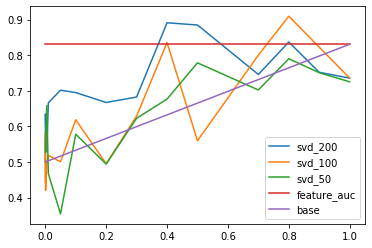

In [9]:
plt.plot(dens_val, values200, label='svd_200')
plt.plot(dens_val, values100, label='svd_100')
plt.plot(dens_val, values50, label='svd_50')
# plt.plot(dens_val, values10, label='svd_10')
# plt.plot(dens_val, values5, label='svd_5')


plt.plot([dens_val[0], dens_val[-1]], [feature_auc, feature_auc], label='feature_auc')
plt.plot([0, 1], [0.5, feature_auc], label='base')
plt.gca().legend()
plt.savefig("svd_"+name+".png", dpi=300)

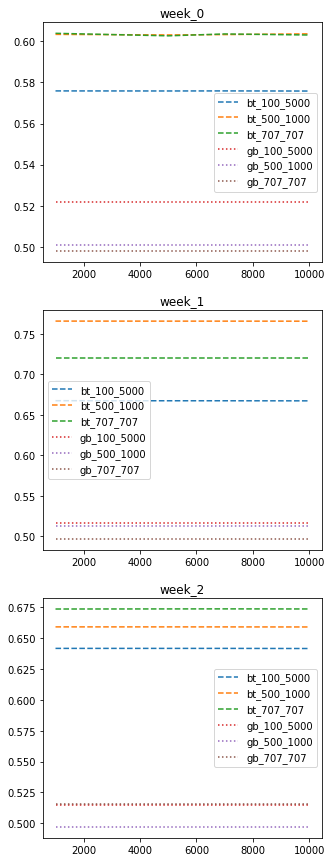

In [7]:
bt_100_5000 = [[0.5758741154145477, 0.57584425657688, 0.5758772777302681, 0.5758112354234918],
              [0.6675771208226221, 0.6674804983070174, 0.6674804983070175, 0.6673838757914128],
              [0.6418350501213006, 0.6418350501213006, 0.6418350501213006, 0.641726414178257],
               
 
]

bt_500_1000 = [[0.6033661892021678, 0.6031086081011164, 0.6032630100787635, 0.6036443624403466], 
              [0.7660664984769106, 0.7660116732438305, 0.7660116732438305, 0.76595684801075], 
              [0.6592678975431226, 0.6592656076860876, 0.6592493954009273, 0.6591965712669854]
]

bt_707_707 = [[0.6038962923463351, 0.6026625706772035, 0.603579490346014, 0.603064601579298],
              [0.7203934043698865, 0.7203934043698865, 0.7203934043698865, 0.7203934043698865],
              [0.6737545483184348, 0.6738294639636976, 0.673866921786329, 0.6737920061410663]
]


gb_100_5000 = [[0.492448169937576, 0.5008205967259802, 0.5654008258192834, 0.5289931727258326], 
            [0.5020856985472097, 0.48398168750568954, 0.5199883487128936, 0.5568400191833746], 
            [0.5020924583207326, 0.4882029382231286, 0.49292164401535477, 0.5776256593839684]]

gb_500_1000 = [[0.49999970241820557, 0.5161694718855874, 0.5047485496223361, 0.48219146344515096], 
               [0.5002687624008292, 0.5022883779939458, 0.4984231449105536, 0.5510735240707462], 
               [0.5004879063676994, 0.4893270170618571, 0.5391554570181586, 0.45943259859858054]]

gb_707_707 = [[0.5000059807742907, 0.49859848182382926, 0.5000734850054753, 0.4927185957700081], 
              [0.5001665239876631, 0.5001917371266403, 0.5141562552527372, 0.4707368234474374],
              [0.500640913035356, 0.5069776565670701, 0.518424462700828, 0.5377477062350436]
             ]

bt_sample_n = [1000, 5000, 7000, 10000]#list(range(100, 5000, 200))

fig, ax = plt.subplots(ncols=1, nrows = 3, figsize=(5,15)) 
for idx in range(3):
    ax[idx].plot(bt_sample_n, bt_100_5000[idx], label = 'bt_100_5000', linestyle = '--')
    ax[idx].plot(bt_sample_n, bt_500_1000[idx], label = 'bt_500_1000', linestyle = '--')
    ax[idx].plot(bt_sample_n, bt_707_707[idx], label = 'bt_707_707', linestyle = '--')
    
    ax[idx].plot([bt_sample_n[0], bt_sample_n[-1]], [sum(gb_100_5000[idx])/len(bt_sample_n)]*2, label = 'gb_100_5000', linestyle = 'dotted')
    ax[idx].plot([bt_sample_n[0], bt_sample_n[-1]], [sum(gb_500_1000[idx])/len(bt_sample_n)]*2, label = 'gb_500_1000', linestyle = 'dotted')
    ax[idx].plot([bt_sample_n[0], bt_sample_n[-1]], [sum(gb_707_707[idx])/len(bt_sample_n)]*2, label = 'gb_707_707', linestyle = 'dotted')
    ax[idx].set_title("week_"+str(idx))
    ax[idx].legend()

plt.show()